## Multiple Linear Regression - Model Selection using RFE
### Boom Bike Case Study
#### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

####  Step 1  Importing and Understanding Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv',parse_dates=['dteday'])

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

###### Observations:
- Except one column which is date type, all other are either float or integer type.
- There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.
- There are no missing values in any of the columns and rows.

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Step 2 : Visualise the data

##### Visualise Numeric Variables

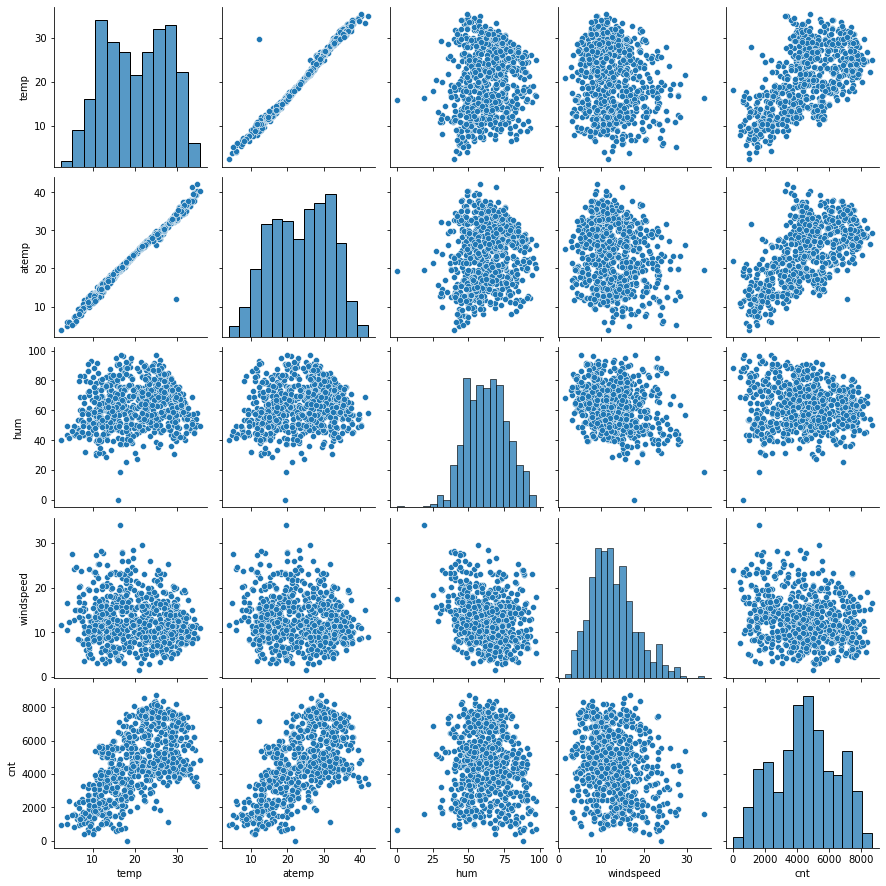

In [7]:
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

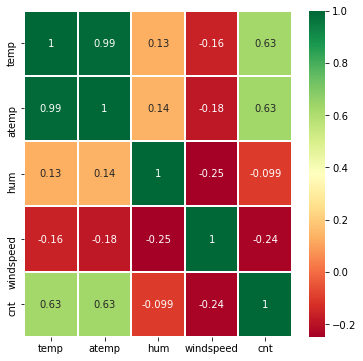

In [8]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

###### Observations
- temp and cnt are highly correlated
- atemp and cnt are highly correlated
- temp and atemp are highly correlated


<function matplotlib.pyplot.show(close=None, block=None)>

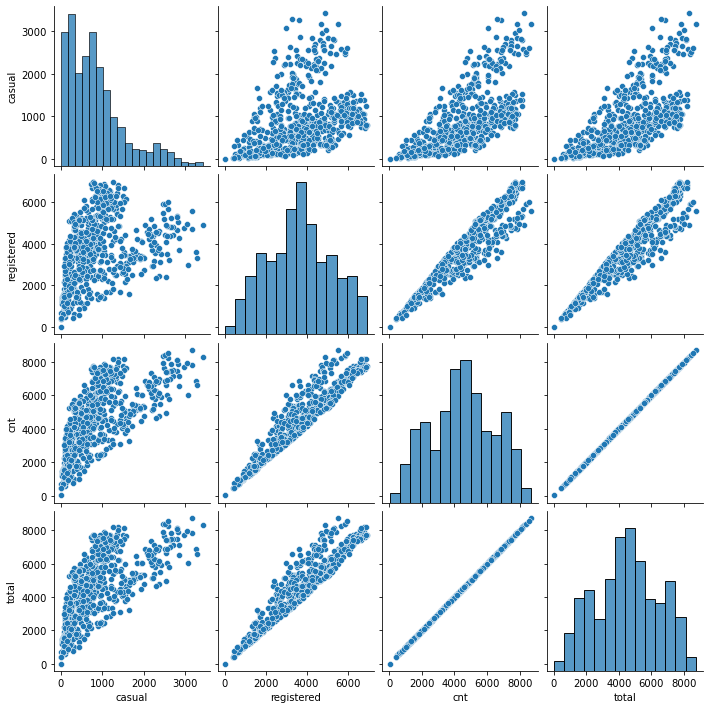

In [9]:
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

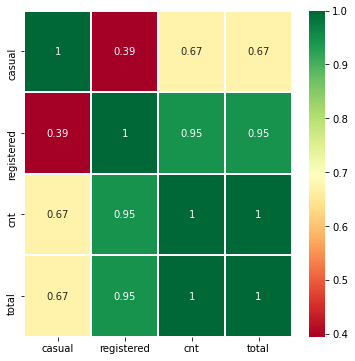

In [10]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

###### Observations 
- From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'.

###### Visualise Categorical Variables

In [11]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'MistCloudy',3:'LightSnow',4:'SnowFog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
cat_df = bike.groupby(['weathersit'])['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
round(cat_df,2)

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
MistCloudy,995024,4044.81,246,30.24,33.70
LightSnow,37869,1803.29,21,1.15,2.88


In [13]:
cat_df = bike.groupby(['season'])['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
round(cat_df,2)   

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


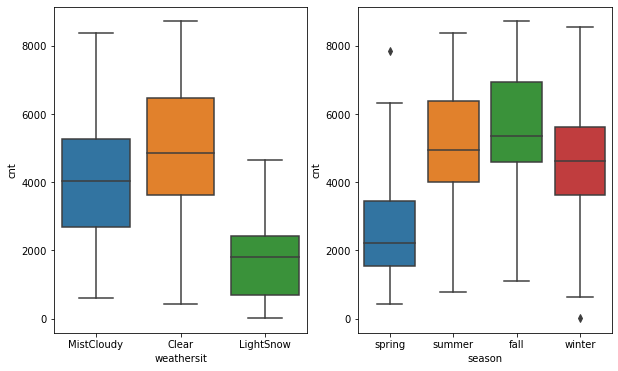

In [14]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(1,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()

###### Observations:
- Almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). 
- This was followed by Misty with 30% of the total booking. 
- It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable.
- The current data frame does not have any data where the weather is Heavy RainSnow
- Almost 32% of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). 
- It is followed by Summer & Winter with 27% & 25% of total booking. 
- It indicates that the season can be a good predictor of the dependent variable.

In [15]:
cat_df = bike.groupby(['mnth'])['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
round(cat_df,2) 

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


In [16]:
cat_df = bike.groupby(['holiday'])['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
round(cat_df,2) 

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


In [17]:
cat_df = bike.groupby(['weekday'])['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
round(cat_df,2) 

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Fri,487790,4690.29,104,14.82,14.25
Thu,485395,4667.26,104,14.75,14.25
Sat,477807,4550.54,105,14.52,14.38
Wed,471214,4574.89,103,14.32,14.11
Tue,469109,4510.66,104,14.25,14.25
Mon,455503,4338.12,105,13.84,14.38
Sun,444027,4228.83,105,13.49,14.38


In [18]:
cat_df = bike.groupby(['workingday'])['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
round(cat_df,2) 

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


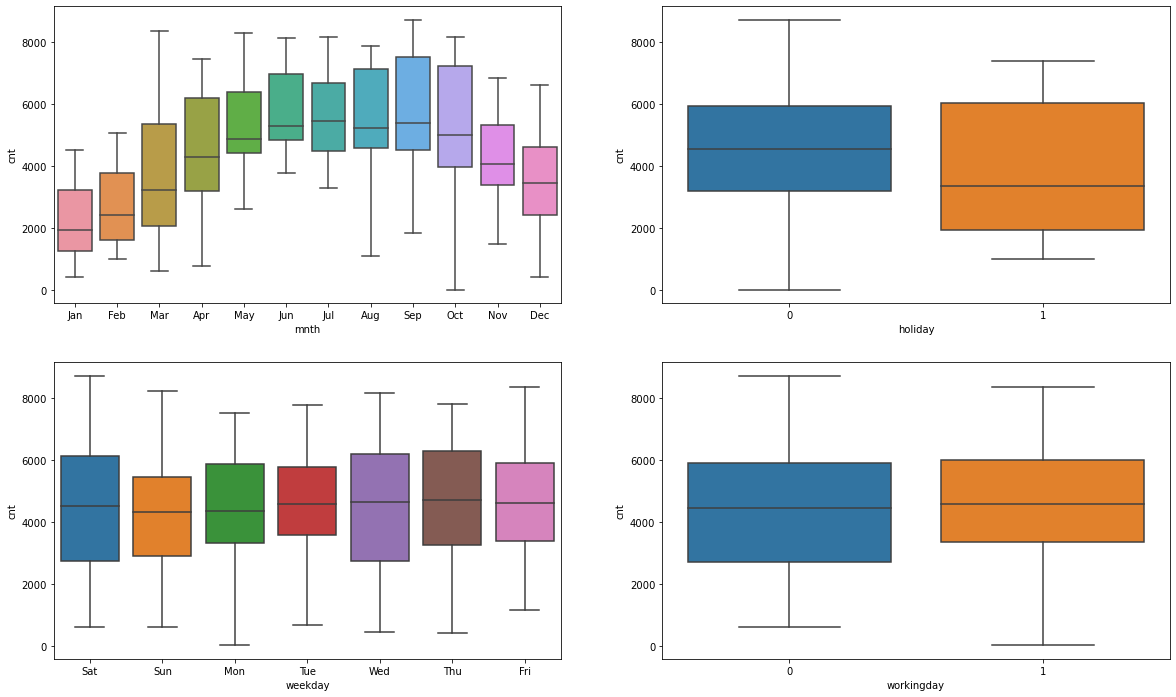

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

###### Observations
- Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. 
- It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.
- Almost 97% of bike rentals are happening during non-holiday time.
- Weekday variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) 
- Weekday Medians is between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. 
- Almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings (for two years). 
- It indicates that the workingday can be a good predictor of the dependent variable

#### Step3 : Data Preparation

###### Dropping the unwanted columns
- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column
- casual & registered: Both these columns contains the count of bike booked by different categories of customers. 
- Temp and atemp are highly correlated , so we can drop atemp.

In [20]:
bike.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)
bike.shape

(730, 11)

##### Dummy Variables

In [21]:
weather = pd.get_dummies(bike['weathersit'] , drop_first=True)
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation

In [22]:
weather.head()

,LightSnow,MistCloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [23]:
#weather.drop(['Clear'], axis = 1, inplace = True)

In [24]:
season = pd.get_dummies(bike['season'] , drop_first=True)
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation

In [25]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
#season.drop(['spring'], axis = 1, inplace = True)

In [27]:
month = pd.get_dummies(bike['mnth'], drop_first = True )
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [28]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation
weekday.head(3)

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


In [29]:
bike2 = pd.concat([pd.concat([bike,season,month,weather,weekday], axis = 1)], axis = 1)

In [30]:
#bike2 = pd.concat([bike1, season], axis = 1)

In [31]:
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [32]:
bike2.drop(['season','mnth','weathersit','weekday'], axis = 1, inplace = True)

#### Step 4 : Splitting data into train and test

In [33]:
bike2_train, bike2_test = train_test_split(bike2, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the features

In [34]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

bike2_train[num_vars] = scaler.fit_transform(bike2_train[num_vars])

In [35]:
bike2_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [36]:
bike2_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


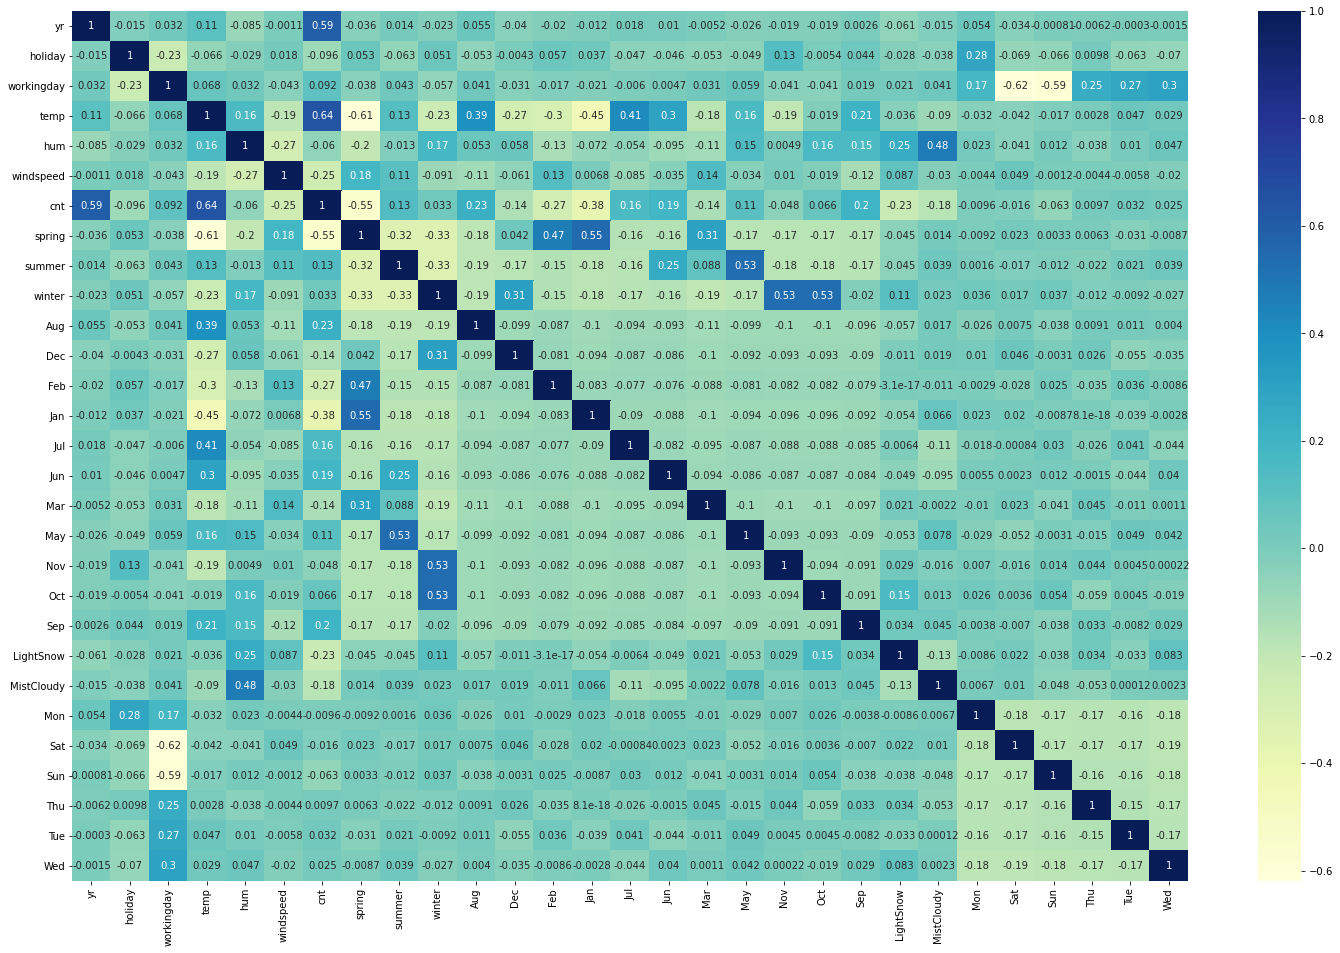

In [37]:
plt.figure(figsize = (25, 16))
sns.heatmap(bike2_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Observations:
- Cnt is correlated with year and temperature
<p> </p>
<br> </br>
There is multi-colinearity between the variables. We need to consider the factors when developing the model.
- Nov and Oct are correlated with Winter
- May is correalted with Summer
- Jan is correlated with Spring



##### Dividing into X and Y

In [38]:
y_train = bike2_train.pop('cnt')
X_train = bike2_train

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [40]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### Step5 : Build a Linear Regression Model using RFE

In [41]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('LightSnow', True, 1),
 ('MistCloudy', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12)]

In [43]:
# Creating list of columns with RFE selected variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'LightSnow', 'MistCloudy', 'Sat',
       'Sun'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [45]:
# Create a dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
13,Sat,12.20
14,Sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.61
4,hum,1.91
12,MistCloudy,1.57


##### Building model using statsmodel for detailed statistics

In [46]:

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.198900
yr            0.229738
holiday      -0.018955
workingday    0.083695
temp          0.527819
hum          -0.159467
windspeed    -0.180601
spring       -0.055434
summer        0.052613
winter        0.100294
Jul          -0.054881
Sep           0.081773
LightSnow    -0.246332
MistCloudy   -0.057847
Sat           0.093682
Sun           0.040479
dtype: float64

In [47]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.13e-191
Time:                        07:05:48   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

##### Droppping the variable and updating the model

In [48]:
# Dropping highly correlated  variables and insignificant variables
# Holiday has high-correlation of 0.373

X1 = X_train_rfe.drop('holiday', 1,)

#X1 = X_train_rfe.drop('workingday', 1,)

In [49]:
# Build a third fitted model
X_train_lm = sm.add_constant(X1)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.13e-191
Time:                        07:05:49   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [51]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
12,Sat,4.91
4,windspeed,4.90
5,spring,4.80
13,Sun,4.76
7,winter,3.71
6,summer,3.03
11,MistCloudy,2.31


##### Droppping the variable and updating the model

In [52]:
# Dropping highly correlated variables and insignificant variables.
# Humidity(hum) has high VIF (32.14)

X2 = X1.drop('hum', 1,)

In [53]:
# Build a third fitted model
X_train_lm = sm.add_constant(X2)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.73e-189
Time:                        07:05:49   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [55]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
11,Sat,4.45
12,Sun,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
7,Jul,1.60


##### Droppping the variable and updating the model

In [56]:
# Dropping highly correlated variables and insignificant variables
# Workingday has high VIF(16.19)
X3 = X2.drop('workingday', 1,)

In [57]:
# Build a third fitted model
X_train_lm = sm.add_constant(X3)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.01e-186
Time:                        07:05:50   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

In [59]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,summer,2.23
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,Jul,1.59
9,MistCloudy,1.55
7,Sep,1.33
10,Sat,1.22


##### Droppping the variable and updating the model

In [60]:
# Dropping highly correlated variables and insignificant variables
# Sat has high pvalue(0.171)
X4 = X3.drop('Sat', 1,)


In [61]:
# Build a third fitted model
X_train_lm = sm.add_constant(X4)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.65e-187
Time:                        07:05:50   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

In [63]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,summer,2.22
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,Jul,1.59
9,MistCloudy,1.55
7,Sep,1.33
10,Sun,1.17


#####  Observation
- Now VIF and co-efficients are in acceptable range. 'Temp' can be retained since VIF is only slightly higher than 5 and is an important variable.
- Final equation:
<p>cnt = 0.2036 + 0.2338yr + 0.4923temp - 0.1498windspeed - 0.0680spring + 0.0467summer + 0.0831winter - 0.0486Jul + 0.0721Sep - 0.2856LightSnow - 0.0816MistCloudy-0.0451Sun</p>

#### Step 6 : Residual Analysis of Train Data

In [64]:
# Predict using the final model
y_train_pred = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

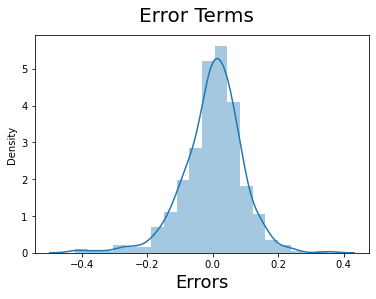

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##### Observation
- Error terms are normally distributed.

#### Step 7 : Making Predictions Using the Final Model

##### Applying the scaling on test sets

In [66]:
num_vars = ['temp',  'hum', 'windspeed','cnt']

bike2_test[num_vars] = scaler.transform(bike2_test[num_vars])

In [67]:
bike2_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X-test and y-test

In [68]:
y_test = bike2_test.pop('cnt')
X_test = bike2_test

In [69]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [70]:
# Making predictions
y_pred = lr_5.predict(X_test_new)

#### Step: 8 Model Evaluation

Text(0, 0.5, 'y_pred')

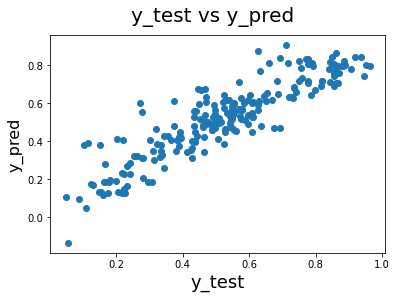

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [72]:
## figuring out R2 score
from sklearn.metrics import r2_score
print("R2 score is : {}".format(r2_score(y_test,y_pred)))

R2 score is : 0.805407680173852


In [73]:
from sklearn.metrics import mean_squared_error

import numpy as np

print ('RMSE value of testing dataset')

print(np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE value of testing dataset
0.09613698294611343
